In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기

In [2]:
data = pd.read_csv("../dataset/band_user_data_by_stat.csv", encoding="cp949")

C:\Users\User\AppData\Local\Temp\ipykernel_20436\1679547652.py:1: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../dataset/band_user_data_by_stat.csv", encoding="cp949")


# 통계 분석 진행하기

## 기초 통계량 확인

In [3]:
print(data.describe())

       account_specific_message  bfban_status    hack_score  \
count                       0.0  44231.000000  44306.000000   
mean                        NaN      1.001085    477.447366   
std                         NaN      0.079273    736.960310   
min                         NaN      1.000000      0.000000   
25%                         NaN      1.000000    100.000000   
50%                         NaN      1.000000    200.000000   
75%                         NaN      1.000000    524.750000   
max                         NaN      8.000000   9795.000000   

       hack_score_current  origin_personal_id     player_id  stats_all  \
count        44306.000000        4.423100e+04  4.430600e+04        0.0   
mean           473.887261        8.145039e+11  8.145532e+11        NaN   
std            732.856073        3.943205e+11  3.942784e+11        NaN   
min              0.000000        1.714343e+08  1.714343e+08        NaN   
25%            100.000000        1.000000e+12  1.000000e+12   

## 변수 간의 상관 관계 확인

In [4]:
relevant_columns = [
    'hack_score', 
    'hack_score_current', 
    'stats.kills', 
    'stats.kpm', 
    'stats.rank', 
    'unreleased_weapons.total_kills'
]

correlation_matrix = data[relevant_columns].corr()
print(correlation_matrix)

                                hack_score  hack_score_current  stats.kills  \
hack_score                        1.000000            0.996151     0.385814   
hack_score_current                0.996151            1.000000     0.379819   
stats.kills                       0.385814            0.379819     1.000000   
stats.kpm                         0.015135            0.015231     0.004692   
stats.rank                        0.449039            0.442342     0.793550   
unreleased_weapons.total_kills    0.385814            0.379819     1.000000   

                                stats.kpm  stats.rank  \
hack_score                       0.015135    0.449039   
hack_score_current               0.015231    0.442342   
stats.kills                      0.004692    0.793550   
stats.kpm                        1.000000   -0.006504   
stats.rank                      -0.006504    1.000000   
unreleased_weapons.total_kills   0.004692    0.793550   

                                unreleased_wea

## 각종 시각화 진행

### 히스토그램

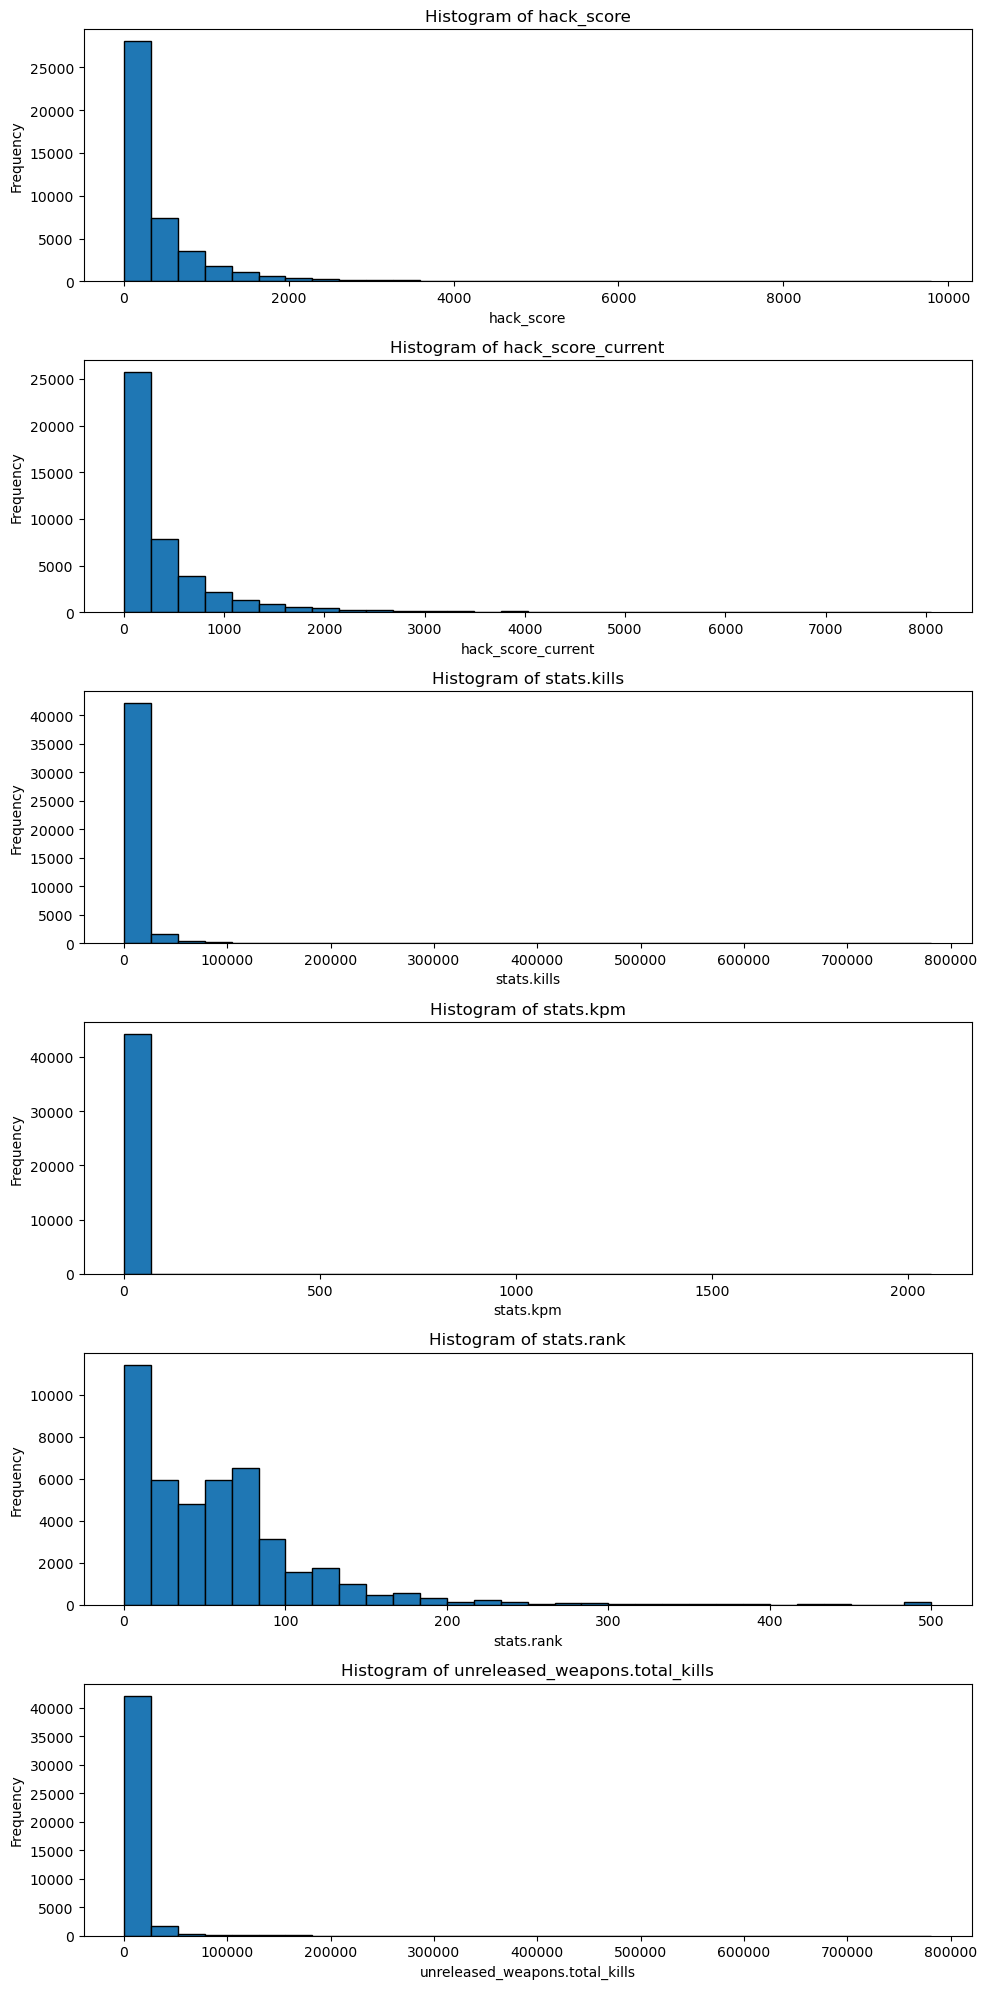

In [5]:
# Define columns for visualization
columns_for_visualization = [
    'hack_score', 
    'hack_score_current', 
    'stats.kills', 
    'stats.kpm', 
    'stats.rank', 
    'unreleased_weapons.total_kills'
]

# Create histograms
fig, axs = plt.subplots(len(columns_for_visualization), 1, figsize=(10, 20))

for i, col in enumerate(columns_for_visualization):
    axs[i].hist(data[col].dropna(), bins=30, edgecolor='k')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 박스 플롯

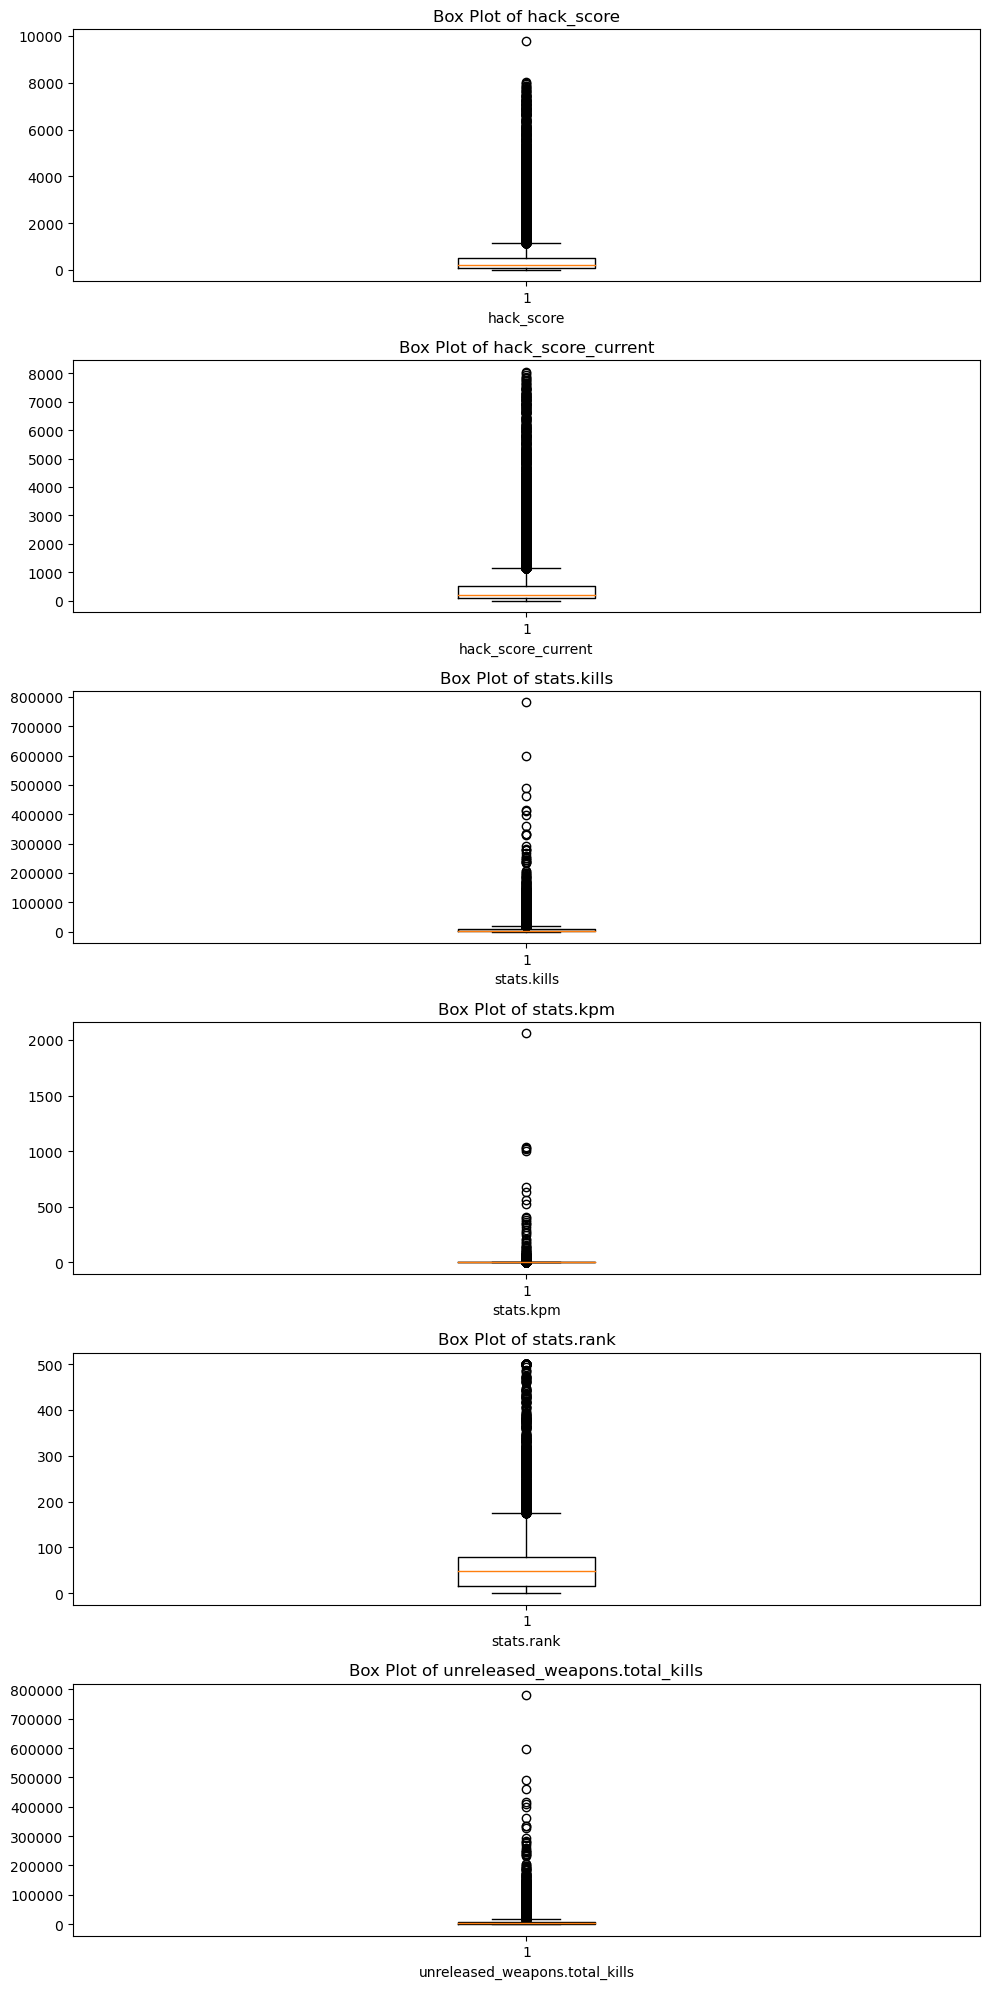

In [6]:
# Create box plots
fig, axs = plt.subplots(len(columns_for_visualization), 1, figsize=(10, 20))

for i, col in enumerate(columns_for_visualization):
    axs[i].boxplot(data[col].dropna())
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()


### 산점도

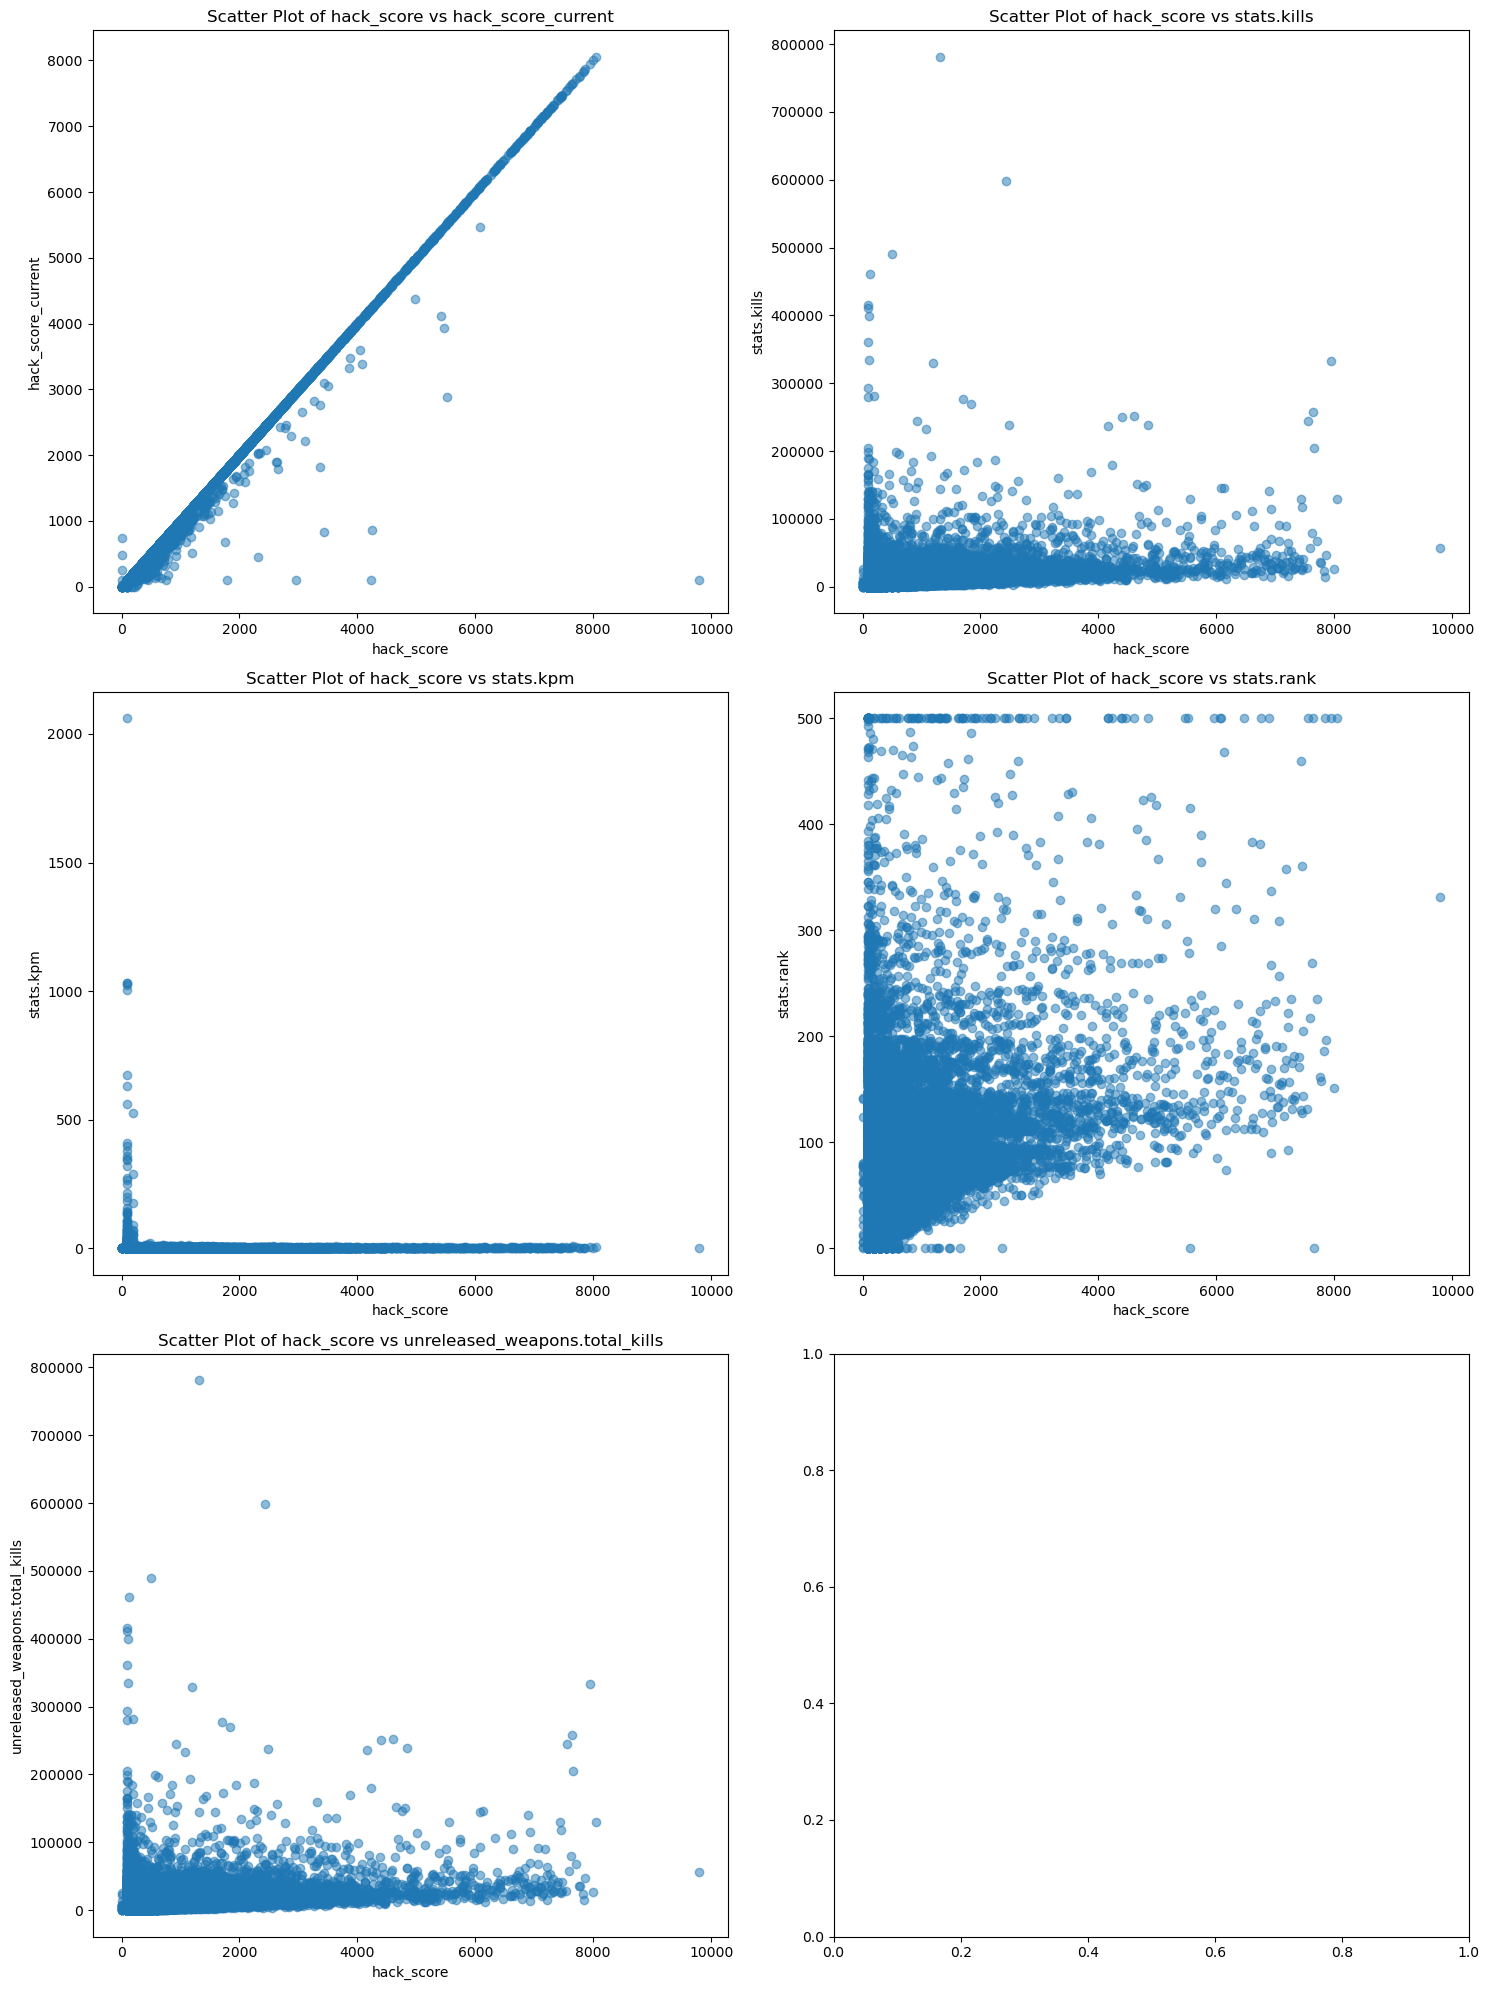

In [7]:
# Create scatter plots
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(columns_for_visualization[1:]):  # Skipping the first column as it will be used as y
    axs[i].scatter(data['hack_score'], data[col], alpha=0.5)
    axs[i].set_title(f'Scatter Plot of hack_score vs {col}')
    axs[i].set_xlabel('hack_score')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


## 이상 행위 값 정의하기

### 사분위수 범위 이용

In [8]:
kpm_data = data['stats.kpm']

# IQR 이용
Q1 = kpm_data.quantile(0.25)
Q3 = kpm_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("낮은 경계값: ", lower_bound)
print("높은 경계값: ", upper_bound)

낮은 경계값:  -0.9349999999999998
높은 경계값:  3.025


### 평균과 표준편차 이용

In [17]:
# 평균과 표준편차 이용
mean = np.mean(kpm_data)
std = np.std(kpm_data)
lower_bound_std = mean - 2 * std
upper_bound_std = mean + 2 * std

print("낮은 경계값: ", lower_bound_std)
print("높은 경계값: ", upper_bound_std)

낮은 경계값:  -30.83306489325365
높은 경계값:  33.962327583391826


In [18]:
np.__version__

'1.26.2'

In [19]:
pd.__version__

'2.2.2'

In [23]:
import matplotlib
matplotlib.__version__

'3.5.2'